In [1]:
#1.	Comprensión del problema y del dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/Dataset Covid19 Panama 10-05-2020.csv')
print(data.head())

   OBJECTID       PROVINCIA    DISTRITO         CORREGIMIENTO  CANTIDAD  \
0         1  BOCAS DEL TORO  ALMIRANTE              ALMIRANTE       1.0   
1         2  BOCAS DEL TORO  ALMIRANTE        BARRIADA GUAYMI       1.0   
2         3  BOCAS DEL TORO  ALMIRANTE         BARRIO FRANCES       NaN   
3         4  BOCAS DEL TORO  ALMIRANTE        NANCE DEL RISCO       NaN   
4         5  BOCAS DEL TORO  ALMIRANTE   VALLE DE AGUA ARRIBA       NaN   

   HOSPITALIZADO  AISLAMIENTO_DOMICILIARIO  FALLECIDO  UCI  RECUPERADO  \
0            0.0                       1.0        0.0  0.0         0.0   
1            0.0                       1.0        0.0  0.0         0.0   
2            NaN                       NaN        NaN  NaN         NaN   
3            NaN                       NaN        NaN  NaN         NaN   
4            NaN                       NaN        NaN  NaN         NaN   

          LONG           LAT                              GlobalID  
0  346352.2773  1.030528e+06  78a70

In [4]:
print(data.duplicated().sum())
#Parece no haber valores duplicados

0


In [5]:
print(data.shape)

#En total tengo 677 filas y 13 columnas

(677, 13)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  677 non-null    int64  
 1   PROVINCIA                 677 non-null    object 
 2   DISTRITO                  677 non-null    object 
 3   CORREGIMIENTO             677 non-null    object 
 4   CANTIDAD                  228 non-null    float64
 5   HOSPITALIZADO             228 non-null    float64
 6   AISLAMIENTO_DOMICILIARIO  228 non-null    float64
 7   FALLECIDO                 228 non-null    float64
 8   UCI                       228 non-null    float64
 9   RECUPERADO                228 non-null    float64
 10  LONG                      677 non-null    float64
 11  LAT                       677 non-null    float64
 12  GlobalID                  677 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 68.9+ KB
None


In [7]:
print(data.isnull().sum())

OBJECTID                      0
PROVINCIA                     0
DISTRITO                      0
CORREGIMIENTO                 0
CANTIDAD                    449
HOSPITALIZADO               449
AISLAMIENTO_DOMICILIARIO    449
FALLECIDO                   449
UCI                         449
RECUPERADO                  449
LONG                          0
LAT                           0
GlobalID                      0
dtype: int64


In [8]:
#En total estamos trabajando con 449 datos faltantes en 7 columnas

In [9]:
print(data.isna().sum())

OBJECTID                      0
PROVINCIA                     0
DISTRITO                      0
CORREGIMIENTO                 0
CANTIDAD                    449
HOSPITALIZADO               449
AISLAMIENTO_DOMICILIARIO    449
FALLECIDO                   449
UCI                         449
RECUPERADO                  449
LONG                          0
LAT                           0
GlobalID                      0
dtype: int64


In [10]:
# Total de datos no nulos por provincia 
total_no_nulos_por_provincia = data.groupby('PROVINCIA').count()

print(total_no_nulos_por_provincia)


                     OBJECTID  DISTRITO  CORREGIMIENTO  CANTIDAD  \
PROVINCIA                                                          
BOCAS DEL TORO             30        30             30         8   
CHIRIQUÍ                  103       103            103        33   
COCLÉ                      47        47             47        21   
COLÓN                      42        42             42        16   
COMARCA GUNA YALA           4         4              4         3   
COMARCA NGÄBE BUGLÉ        70        70             70         7   
DARIEN                     26        26             26         7   
EMBERA WOUNAAN              5         5              5         2   
HERRERA                    49        49             49        15   
LOS SANTOS                 81        81             81         6   
PANAMÁ                     57        57             57        40   
PANAMÁ OESTE               59        59             59        40   
VERAGUAS                  104       104         

In [11]:
#Las provincias con mayor cantidad de valores nulos son: Los Santos, Veraguas y Chiriquí

In [12]:
# Total de datos no nulos por provincia 
total_no_nulos_por_distrito = data.groupby('DISTRITO').count()

print(total_no_nulos_por_distrito)

                OBJECTID  PROVINCIA  CORREGIMIENTO  CANTIDAD  HOSPITALIZADO  \
DISTRITO                                                                      
AGUADULCE              8          8              8         4              4   
ALANJE                 9          9              9         4              4   
ALMIRANTE              6          6              6         2              2   
ANTÓN                 10         10             10         5              5   
ARRAIJÁN               8          8              8         8              8   
...                  ...        ...            ...       ...            ...   
TABOGA                 3          3              3         0              0   
TIERRAS ALTAS          5          5              5         2              2   
TOLÉ                   9          9              9         0              0   
TONOSÍ                11         11             11         0              0   
ÑURUM                  4          4              4  

In [13]:
# Total de datos no nulos por provincia 
total_no_nulos_por_corregimiento = data.groupby('CORREGIMIENTO').count()

print(total_no_nulos_por_corregimiento)

                   OBJECTID  PROVINCIA  DISTRITO  CANTIDAD  HOSPITALIZADO  \
CORREGIMIENTO                                                               
24 DE DICIEMBRE           1          1         1         1              1   
ACHIOTE                   1          1         1         0              0   
AGUA BUENA                1          1         1         0              0   
AGUA DE SALUD             1          1         1         0              0   
AGUA FRIA                 1          1         1         1              1   
...                     ...        ...       ...       ...            ...   
VOLCAN (CABECERA)         1          1         1         1              1   
YAPE                      1          1         1         0              0   
YAVIZA                    1          1         1         1              1   
ZAPALLAL                  1          1         1         0              0   
ZAPOTILLO                 1          1         1         0              0   

In [14]:
print(data.isna().sum())

OBJECTID                      0
PROVINCIA                     0
DISTRITO                      0
CORREGIMIENTO                 0
CANTIDAD                    449
HOSPITALIZADO               449
AISLAMIENTO_DOMICILIARIO    449
FALLECIDO                   449
UCI                         449
RECUPERADO                  449
LONG                          0
LAT                           0
GlobalID                      0
dtype: int64


In [15]:
# Columnas con valores faltantes para imputar
columnas_a_imputar = ['CANTIDAD', 'HOSPITALIZADO', 'AISLAMIENTO_DOMICILIARIO', 'FALLECIDO', 'UCI', 'RECUPERADO']

# Seleccionamos las columnas numéricas
data_imputar = data[columnas_a_imputar]

# Imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Aplicamos el KNNImputer a las columnas
data_imputada = imputer.fit_transform(data_imputar)

# Redondeamos los valores imputados
data_imputada = np.round(data_imputada).astype(int)

# Creamos un Dataframe para las columnas imputadas
data_imputada_df = pd.DataFrame(data_imputada, columns=columnas_a_imputar)
data[columnas_a_imputar] = data_imputada_df

# Cantidad de Valores Nulos después de la Imputación
print(data.isnull().sum())

# Primeras filas del dataset
print(data.head())

# Guardar el DataFrame imputado en un archivo CSV
data.to_csv('data_imputada.csv', index=False)

OBJECTID                    0
PROVINCIA                   0
DISTRITO                    0
CORREGIMIENTO               0
CANTIDAD                    0
HOSPITALIZADO               0
AISLAMIENTO_DOMICILIARIO    0
FALLECIDO                   0
UCI                         0
RECUPERADO                  0
LONG                        0
LAT                         0
GlobalID                    0
dtype: int64
   OBJECTID       PROVINCIA    DISTRITO         CORREGIMIENTO  CANTIDAD  \
0         1  BOCAS DEL TORO  ALMIRANTE              ALMIRANTE         1   
1         2  BOCAS DEL TORO  ALMIRANTE        BARRIADA GUAYMI         1   
2         3  BOCAS DEL TORO  ALMIRANTE         BARRIO FRANCES        37   
3         4  BOCAS DEL TORO  ALMIRANTE        NANCE DEL RISCO        37   
4         5  BOCAS DEL TORO  ALMIRANTE   VALLE DE AGUA ARRIBA        37   

   HOSPITALIZADO  AISLAMIENTO_DOMICILIARIO  FALLECIDO  UCI  RECUPERADO  \
0              0                         1          0    0           0  

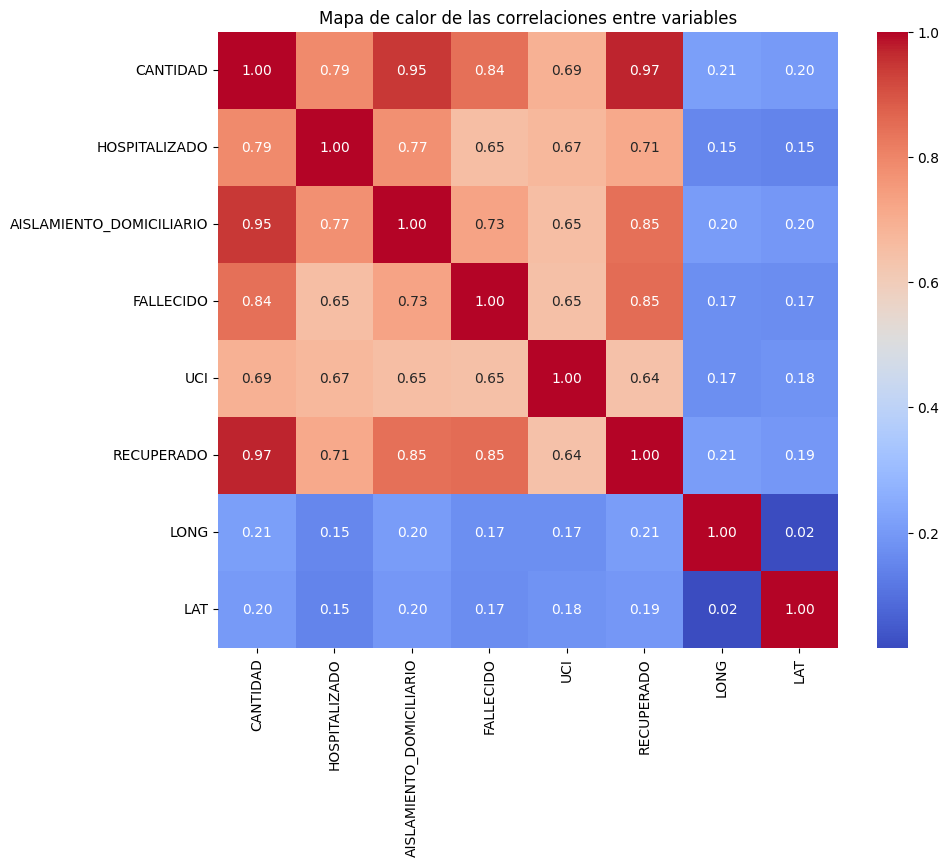

In [16]:
#3. Feature Engineering

#Mapa de Calor

import seaborn as sns

df = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/data_imputada.csv')

selected_columns = ['CANTIDAD', 'HOSPITALIZADO', 'AISLAMIENTO_DOMICILIARIO', 'FALLECIDO', 'UCI', 'RECUPERADO', 'LONG', 'LAT']

#Matriz de Correlación
corr_matrix = df[selected_columns].corr()

#Mapa de Calor

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones entre variables')

plt.savefig('Mapa de calor de las correlaciones entre variables.png')
plt.show()

In [17]:
#Generación de nuevas características

# Como algunas características tienen valores de cero, añadimos un pequeño valor para evitar dividir entre cero.
#Este valor no nos afectará significativamente los resultados
epsilon = 1e-6

#1. Ratios entre los casos:

# Hospitalizados vs Fallecidos
df['ratio_hospitalizados_fallecidos'] = df['HOSPITALIZADO'] / (df['FALLECIDO'] + epsilon)

# Recuperados vs Aislados
df['ratio_recuperados_aislados'] = df['RECUPERADO'] / (df['AISLAMIENTO_DOMICILIARIO'] + epsilon)

# Hospitalizados vs Recuperados
df['ratio_hospitalizados_recuperados'] = df['HOSPITALIZADO'] / (df['RECUPERADO'] + epsilon)

#2. Relación entre las coordenadas geográficas (LONG, LAT) y la Cantidad de Casos.

# Relación entre las coordenadas geográficas y la cantidad de casos
df["DISTANCIA_CANTIDAD"] = (df['LONG'] ** 2 + df['LAT'] ** 2) ** 0.5 * df['CANTIDAD']

# Mostrar las primeras filas del dataset con las nuevas características
df.head()

#Guardamos el dataset con las nuevas características

df.to_csv('dataset con nuevas caracteristicas agregadas.csv', index=False)


In [18]:
#Generamos un Dataset para Bocas del Toro
dataframe = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/dataset con nuevas caracteristicas agregadas.csv')
bocas_del_toro = dataframe[dataframe['PROVINCIA'] == 'BOCAS DEL TORO']

bocas_del_toro.to_csv('dataset_bocas_del_toro.csv', index=False)

In [19]:
#Generamos un Dataset para Chiriquí
dataframe = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/dataset con nuevas caracteristicas agregadas.csv')
chiriqui = dataframe[dataframe['PROVINCIA'] == 'CHIRIQUÍ']

chiriqui.to_csv('dataset_chiriqui.csv', index=False)

In [20]:
#BOCAS DEL TORO
#PARA PODER CONSIDERAR LAS COLUMNAS DE PROVINCIA, DISTRITO Y CORREGIMIENTO 
#COMO PARTE DE NUESTRO MODELO, DEBEMOS TRANSFORMAR SUS DATOS A NUMÉRICOS
dfbt = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/dataset_bocas_del_toro.csv')

# Aplicamos One-Hot Encoding a las columnas categóricas 'PROVINCIA', 'DISTRITO', y 'CORREGIMIENTO'
df_dummies = pd.get_dummies(dfbt, columns=['PROVINCIA', 'DISTRITO', 'CORREGIMIENTO'])

# Guardar el nuevo dataframe en un archivo CSV
df_dummies.to_csv('Dataset Bocas del Toro con Columnas Numéricas.csv', index=False)

# Mostrar las primeras filas del dataframe procesado (opcional)
print(df_dummies.head())


   OBJECTID  CANTIDAD  HOSPITALIZADO  AISLAMIENTO_DOMICILIARIO  FALLECIDO  \
0         1         1              0                         1          0   
1         2         1              0                         1          0   
2         3        37              1                        16          1   
3         4        37              1                        16          1   
4         5        37              1                        16          1   

   UCI  RECUPERADO         LONG           LAT  \
0    0           0  346352.2773  1.030528e+06   
1    0           0  342522.3625  1.028730e+06   
2    0          19  349406.2891  1.028417e+06   
3    0          19  318747.8223  1.002572e+06   
4    0          19  349040.0681  1.019400e+06   

                               GlobalID  ...  CORREGIMIENTO_LAS TABLAS  \
0  78a7066b-dd3c-495d-8030-ce63e39dd394  ...                     False   
1  a09e8e0c-d93a-4232-bfa8-557046d43c44  ...                     False   
2  c3b21f87-6851-4ca

In [21]:
#ENTRENAMIENTO DEL MODELO PARA BOCAS DEL TORO


# Traemos el dataset para realizar el entrenamiento
df_BT = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/Dataset Bocas del Toro con Columnas Numéricas.csv')

# DEFINIMOS NUESTRAS VARIABLES INDEPENDIENTES (X) Y NUESTRA VARIABLE OBJETIVO (Y)
X = df_BT.drop(['CANTIDAD','GlobalID'], axis=1)  # features (características)
y = df_BT['CANTIDAD']  # target (variable objetivo)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Modelo de Regresión Lineal
model = LinearRegression()

# VALIDACIÓN CRUZADA de 5-FOLDS
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []

#Se dividen los datos en 5 folds. Se usan 4 para entrenar el modelo, y uno para probarlo. Repetimos el proceso 5 veces
for train_index, val_index in kf.split(X_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    
    model.fit(X_train_fold, y_train_fold)
    
    
    y_val_pred = model.predict(X_val_fold)
    
    # Métricas de error después de cada fold
    MAE = mean_absolute_error(y_val_fold, y_val_pred)
    MSE = mean_squared_error(y_val_fold, y_val_pred)
    RMSE = np.sqrt(MSE)
    
    
    mae_scores.append(MAE)
    mse_scores.append(MSE)
    rmse_scores.append(RMSE)

#Resultados de la validación cruzada
mae_scores = np.array(mae_scores)
mse_scores = np.array(mse_scores)
rmse_scores = np.array(rmse_scores)


print("MAE Scores: ", mae_scores)
print("MAE Promedio: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))
print("MSE Scores: ", mse_scores)
print("MSE Promedio: %0.2f (+/- %0.2f)" % (mse_scores.mean(), mse_scores.std()))
print("RMSE Scores: ", rmse_scores)
print("RMSE Promedio: %0.2f (+/- %0.2f)" % (rmse_scores.mean(), rmse_scores.std()))

# Entrenamos el modelo final de regresión lineal con los datos de entrenamiento y prueba que dividimos nosotros
model.fit(X_train, y_train)

#Predicciones para el conjunto de prueba del modelo de regresión lineal
y_pred = model.predict(X_test)

# Métricas para el conjunto de prueba
MAE_test = mean_absolute_error(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, y_pred)

# Resultados finales del modelo
print("Intercept: %f, Coeficiente(s): %s" % (model.intercept_, model.coef_))
print("MAE en el conjunto de prueba: %f" % MAE_test)
print("MSE en el conjunto de prueba: %f" % MSE_test)
print("RMSE en el conjunto de prueba: %f" % RMSE_test)
print("R² en el conjunto de prueba: %f" % R2_test)



MAE Scores:  [6.83543280e-02 8.52673732e-02 2.73345729e+03 1.57493044e-02
 7.90769088e-02]
MAE Promedio: 546.74 (+/- 1093.36)
MSE Scores:  [1.19555901e-02 1.23199040e-02 3.73533334e+07 4.46373517e-04
 1.46170585e-02]
MSE Promedio: 7470666.68 (+/- 14941333.35)
RMSE Scores:  [1.09341621e-01 1.10995063e-01 6.11173735e+03 2.11275535e-02
 1.20901028e-01]
RMSE Promedio: 1222.42 (+/- 2444.66)
Intercept: 34.395945, Coeficiente(s): [ 1.96870689e-03 -7.49878168e-03  3.32329805e-02 -7.49878563e-03
  5.42881712e-15  9.11257133e-02 -1.00753872e-05 -2.98893653e-05
 -3.55208935e-03  4.34134142e-02  3.55201588e-03  8.59156175e-07
  0.00000000e+00 -1.48325120e-02  1.18144995e-02  2.34115870e-02
 -2.03935744e-02 -5.89120857e-02  1.08554453e-02 -1.65831119e-02
 -1.50695960e-01  4.83627628e-02  2.54492534e-03  7.50543688e-03
  0.00000000e+00  1.49548959e-01  1.97334439e-09 -1.25599239e-02
 -6.65265743e-02  0.00000000e+00 -3.27471587e-02  0.00000000e+00
 -2.92823747e-02 -2.89734718e-02  1.57240070e-01 -2.9

In [23]:
# Modelo de Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# VALIDACIÓN CRUZADA de 5-FOLDS
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


mae_scores_rf = []
mse_scores_rf = []
rmse_scores_rf = []

#Se dividen los datos en 5 folds. Se usan 4 para entrenar el modelo, y uno para probarlo. Repetimos el proceso 5 veces

for train_index, val_index in kf.split(X_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    
    random_forest_model.fit(X_train_fold, y_train_fold)
    
    
    y_val_pred_rf = random_forest_model.predict(X_val_fold)
    
    # Métricas de error después de cada fold
    mae_val_rf = mean_absolute_error(y_val_fold, y_val_pred_rf)
    mse_val_rf = mean_squared_error(y_val_fold, y_val_pred_rf)
    rmse_val_rf = np.sqrt(mse_val_rf)
    
    
    mae_scores_rf.append(mae_val_rf)
    mse_scores_rf.append(mse_val_rf)
    rmse_scores_rf.append(rmse_val_rf)

#Resultados de la validación cruzada
mae_scores_rf = np.array(mae_scores_rf)
mse_scores_rf = np.array(mse_scores_rf)
rmse_scores_rf = np.array(rmse_scores_rf)


print("MAE Scores por fold: ", mae_scores_rf)
print("MAE Promedio: %0.2f (+/- %0.2f)" % (mae_scores_rf.mean(), mae_scores_rf.std()))
print("MSE Scores por fold: ", mse_scores_rf)
print("MSE Promedio: %0.2f (+/- %0.2f)" % (mse_scores_rf.mean(), mse_scores_rf.std()))
print("RMSE Scores por fold: ", rmse_scores_rf)
print("RMSE Promedio: %0.2f (+/- %0.2f)" % (rmse_scores_rf.mean(), rmse_scores_rf.std()))

# Entrenamos el modelo final de random forest con los datos de entrenamiento y prueba que dividimos nosotros

random_forest_model.fit(X_train, y_train)

#Predicciones para el conjunto de prueba del modelo de random forest
y_pred_rf = random_forest_model.predict(X_test)

# Métricas para el conjunto de prueba
mae_rf_test = mean_absolute_error(y_test, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf)

# Resultados finales del modelo
print(f"MAE (Random Forest en conjunto de prueba): {mae_rf_test}")
print(f"MSE (Random Forest en conjunto de prueba): {mse_rf_test}")
print(f"RMSE (Random Forest en conjunto de prueba): {rmse_rf_test}")
print(f"R² (Random Forest en conjunto de prueba): {r2_rf_test}")

MAE Scores por fold:  [0.56  1.592 4.124 0.    0.85 ]
MAE Promedio: 1.43 (+/- 1.44)
MSE Scores por fold:  [ 1.568   12.67232 29.57656  0.       2.89   ]
MSE Promedio: 9.34 (+/- 11.04)
RMSE Scores por fold:  [1.25219807 3.55982022 5.4384336  0.         1.7       ]
RMSE Promedio: 2.39 (+/- 1.90)
MAE (Random Forest en conjunto de prueba): 1.235
MSE (Random Forest en conjunto de prueba): 9.15135
RMSE (Random Forest en conjunto de prueba): 3.025119832337225
R² (Random Forest en conjunto de prueba): 0.943001972318339


In [24]:
#CHIRIQUI
#PARA PODER CONSIDERAR LAS COLUMNAS DE PROVINCIA, DISTRITO Y CORREGIMIENTO 
#COMO PARTE DE NUESTRO MODELO, DEBEMOS TRANSFORMAR SUS DATOS A NUMÉRICOS
dfbt = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/dataset_chiriqui.csv')

# Aplicamos One-Hot Encoding a las columnas categóricas 'PROVINCIA', 'DISTRITO', y 'CORREGIMIENTO'
df_dummies = pd.get_dummies(dfbt, columns=['PROVINCIA', 'DISTRITO', 'CORREGIMIENTO'])

# Guardar el nuevo dataframe en un archivo CSV
df_dummies.to_csv('Dataset Chiriqui con Columnas Numéricas.csv', index=False)

# Mostrar las primeras filas del dataframe procesado (opcional)
print(df_dummies.head())


   OBJECTID  CANTIDAD  HOSPITALIZADO  AISLAMIENTO_DOMICILIARIO  FALLECIDO  \
0        31         2              0                         0          0   
1        32        37              1                        16          1   
2        33         5              0                         1          0   
3        34         9              1                         8          0   
4        35        37              1                        16          1   

   UCI  RECUPERADO         LONG          LAT  \
0    0           2  328375.6727  929101.6058   
1    0          19  321434.4217  927214.7104   
2    0           4  314232.5090  929305.8923   
3    0           0  327563.7260  932860.9066   
4    0          19  330693.9697  920871.0125   

                               GlobalID  ...  CORREGIMIENTO_SANTA ROSA  \
0  fd9f6066-4e61-4048-aad6-ad3bc97ce3b6  ...                     False   
1  5c440d2e-28da-4a26-8128-2f90d614d09a  ...                     False   
2  fa8cef4a-3aca-4155-ba7c

In [25]:
#ENTRENAMIENTO DEL MODELO PARA CHIRIQUÍ


# Traemos el dataset para realizar el entrenamiento
df_BT = pd.read_csv('C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/INTRODUCCION A CIENCIA DE DATOS/PROYECTO FINAL INTRODUCCION A CIENCIA DE DATOS/Dataset Chiriqui con Columnas Numéricas.csv')

# DEFINIMOS NUESTRAS VARIABLES INDEPENDIENTES (X) Y NUESTRA VARIABLE OBJETIVO (Y)
X = df_BT.drop(['CANTIDAD','GlobalID'], axis=1)  # features (características)
y = df_BT['CANTIDAD']  # target (variable objetivo)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Modelo de Regresión Lineal
model = LinearRegression()

# VALIDACIÓN CRUZADA de 5-FOLDS
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []

#Se dividen los datos en 5 folds. Se usan 4 para entrenar el modelo, y uno para probarlo. Repetimos el proceso 5 veces

for train_index, val_index in kf.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    
    model.fit(X_train_fold, y_train_fold)
    
    
    y_val_pred = model.predict(X_val_fold)
    
    # Métricas de error después de cada fold
    MAE = mean_absolute_error(y_val_fold, y_val_pred)
    MSE = mean_squared_error(y_val_fold, y_val_pred)
    RMSE = np.sqrt(MSE)
    
    
    mae_scores.append(MAE)
    mse_scores.append(MSE)
    rmse_scores.append(RMSE)

#Resultados de la validación cruzada
mae_scores = np.array(mae_scores)
mse_scores = np.array(mse_scores)
rmse_scores = np.array(rmse_scores)


print("MAE Scores: ", mae_scores)
print("MAE Promedio: %0.2f (+/- %0.2f)" % (mae_scores.mean(), mae_scores.std()))
print("MSE Scores: ", mse_scores)
print("MSE Promedio: %0.2f (+/- %0.2f)" % (mse_scores.mean(), mse_scores.std()))
print("RMSE Scores: ", rmse_scores)
print("RMSE Promedio: %0.2f (+/- %0.2f)" % (rmse_scores.mean(), rmse_scores.std()))

# Entrenamos el modelo final de regresión lineal con los datos de entrenamiento y prueba que dividimos nosotros

model.fit(X_train, y_train)

#Predicciones para el conjunto de prueba del modelo de regresión lineal

y_pred = model.predict(X_test)

# Métricas para el conjunto de prueba

MAE_test = mean_absolute_error(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, y_pred)

# Resultados finales del modelo

print("Intercept: %f, Coeficiente(s): %s" % (model.intercept_, model.coef_))
print("MAE en el conjunto de prueba: %f" % MAE_test)
print("MSE en el conjunto de prueba: %f" % MSE_test)
print("RMSE en el conjunto de prueba: %f" % RMSE_test)
print("R² en el conjunto de prueba: %f" % R2_test)


MAE Scores:  [1.76809028e+04 4.75866566e-02 2.70198064e+03 9.42629651e-02
 2.97929614e-01]
MAE Promedio: 4076.66 (+/- 6882.14)
MSE Scores:  [5.31433814e+09 4.73864803e-03 1.16789099e+08 1.73579035e-02
 5.16370419e-01]
MSE Promedio: 1086225447.70 (+/- 2114540183.36)
RMSE Scores:  [7.28995071e+04 6.88378387e-02 1.08069005e+04 1.31749396e-01
 7.18589187e-01]
RMSE Promedio: 16741.47 (+/- 28389.24)
Intercept: 7.607485, Coeficiente(s): [-2.50960325e-04  6.04225089e-01  7.39258714e-01  7.73691466e-01
  3.11799243e-01  7.55650681e-01 -3.11321229e-06 -6.94823216e-06
  1.66263798e-07 -9.53040573e-09 -1.31446283e-08  2.55313374e-07
  1.55431223e-15 -4.07113930e-02 -5.93333920e-02  6.97996274e-02
  2.15556414e-02  2.19555363e-03 -2.52943886e-02 -1.43805042e-02
  2.96124423e-03  8.42478940e-03 -4.94607694e-02  1.61884204e-02
  2.53564794e-02  2.98208104e-02  1.28778810e-02 -1.38777878e-17
  9.47768907e-02  3.11799243e-01  7.37066390e-02 -8.69865606e-02
  1.81625605e-01  5.40043222e-03  1.58991345e-

In [27]:
# Modelo de Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# VALIDACIÓN CRUZADA de 5-FOLDS
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


mae_scores_rf = []
mse_scores_rf = []
rmse_scores_rf = []

#Se dividen los datos en 5 folds. Se usan 4 para entrenar el modelo, y uno para probarlo. Repetimos el proceso 5 veces

for train_index, val_index in kf.split(X_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    
    random_forest_model.fit(X_train_fold, y_train_fold)
    
    
    y_val_pred_rf = random_forest_model.predict(X_val_fold)
    
    # Métricas de error después de cada fold
    mae_val_rf = mean_absolute_error(y_val_fold, y_val_pred_rf)
    mse_val_rf = mean_squared_error(y_val_fold, y_val_pred_rf)
    rmse_val_rf = np.sqrt(mse_val_rf)
    
    
    mae_scores_rf.append(mae_val_rf)
    mse_scores_rf.append(mse_val_rf)
    rmse_scores_rf.append(rmse_val_rf)

#Resultados de la validación cruzada
mae_scores_rf = np.array(mae_scores_rf)
mse_scores_rf = np.array(mse_scores_rf)
rmse_scores_rf = np.array(rmse_scores_rf)


print("MAE Scores por fold: ", mae_scores_rf)
print("MAE Promedio: %0.2f (+/- %0.2f)" % (mae_scores_rf.mean(), mae_scores_rf.std()))
print("MSE Scores por fold: ", mse_scores_rf)
print("MSE Promedio: %0.2f (+/- %0.2f)" % (mse_scores_rf.mean(), mse_scores_rf.std()))
print("RMSE Scores por fold: ", rmse_scores_rf)
print("RMSE Promedio: %0.2f (+/- %0.2f)" % (rmse_scores_rf.mean(), rmse_scores_rf.std()))

# Entrenamos el modelo final de random forest con los datos de entrenamiento y prueba que dividimos nosotros

random_forest_model.fit(X_train, y_train)

#Predicciones para el conjunto de prueba del modelo de random forest

y_pred_rf = random_forest_model.predict(X_test)

# Métricas para el conjunto de prueba

mae_rf_test = mean_absolute_error(y_test, y_pred_rf)
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf)

#Resultados finales del modelo
print(f"MAE (Random Forest en conjunto de prueba): {mae_rf_test}")
print(f"MSE (Random Forest en conjunto de prueba): {mse_rf_test}")
print(f"RMSE (Random Forest en conjunto de prueba): {rmse_rf_test}")
print(f"R² (Random Forest en conjunto de prueba): {r2_rf_test}")

MAE Scores por fold:  [0.38882353 0.02705882 0.535625   0.033125   0.225     ]
MAE Promedio: 0.24 (+/- 0.20)
MSE Scores por fold:  [0.70755882 0.00952941 1.53968125 0.00638125 0.4590875 ]
MSE Promedio: 0.54 (+/- 0.57)
RMSE Scores por fold:  [0.84116516 0.09761871 1.24083893 0.07988273 0.67755996]
RMSE Promedio: 0.59 (+/- 0.45)
MAE (Random Forest en conjunto de prueba): 0.02238095238095238
MSE (Random Forest en conjunto de prueba): 0.007128571428571426
RMSE (Random Forest en conjunto de prueba): 0.08443086774735545
R² (Random Forest en conjunto de prueba): 0.9999633250892461
